# Introduction to convnets
![title](./pics/intro-pic.png)

In [7]:
# imports
import numpy as np

# keras imports 
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.applications import VGG16
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# visualization imports
import os, shutil
import matplotlib.pyplot as plt

%matplotlib inline

## Instantiating a small convnet

In [26]:
# model architecture developement
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## Adding a classifier on top of the convnet

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [14]:
# function to plot model training logs
def plot_model_training_history(history_dict, plot_val=True,chart_type="--o"):
    acc = history_dict['acc']
    loss = history_dict['loss']
    
    if plot_val:
        val_acc = history_dict['val_acc']
        val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    # visualize model training
    epochs = range(1, len(acc) + 1)
    fig, axs = plt.subplots(1, 2,figsize=(15,5))
    axs[0].plot(epochs, loss, chart_type, label='Training loss')
    if plot_val:
        axs[0].plot(epochs, val_loss, chart_type, label='Validation loss')
        axs[0].set_title('training & validation loss')
    else:
        axs[0].set_title('training loss')
                               
    axs[1].plot(epochs, acc, chart_type, label='Training acc')
    if plot_val:
        axs[1].plot(epochs, val_acc, chart_type, label='Validation acc')
        axs[1].set_title('training & validation accuracy')                      
    else:
        axs[1].set_title('training accuracy')                      

    plt.show()
    plt.close()

## Training our convnet on MNIST images

input_train shape: (60000, 28, 28, 1)
input_test shape: (10000, 28, 28, 1) 

visualizing mnist data samples..


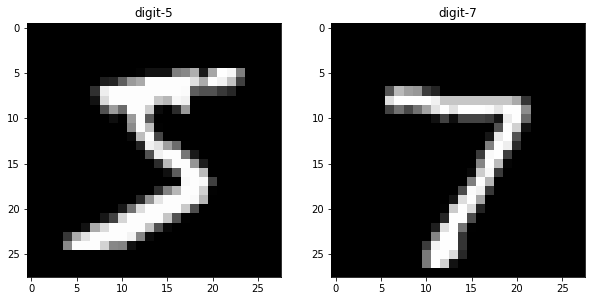


mnist data lables
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Starting model training..

Epoch 1/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.0033 - acc: 0.9993
Epoch 2/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0025 - acc: 0.9995
Epoch 3/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0025 - acc: 0.9995
Epoch 4/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0027 - acc: 0.9995
Epoch 5/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0017 - acc: 0.9997
Epoch 6/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0031 - acc: 0.9995
Epoch 7/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0023 - acc: 0.9995
Epoch 8/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0026 - acc: 0.9996
Epoch 9/10
60000/60000 [==============================] - 20s 341us/st

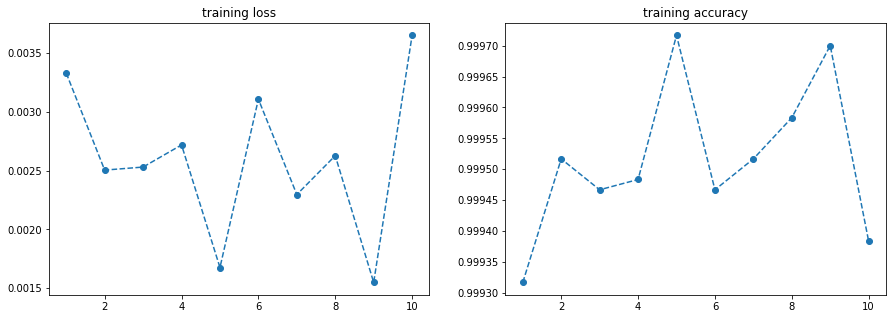

Final accuracy on evaluation data: 99.0%


In [83]:
# loading the mnist dataset
(train_images_, train_labels), (test_images_, test_labels) = mnist.load_data()
train_images = train_images_.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images_.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# data understanding
print('input_train shape:', train_images.shape)
print('input_test shape:', test_images.shape, "\n")

print ("visualizing mnist data samples..")
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].set_title('digit-5')
axarr[0].imshow(train_images_[0])
axarr[1].set_title('digit-7')
axarr[1].imshow(test_images_[0])
plt.show()
plt.close()

print ("\nmnist data lables")
print (train_labels[:2])
print ("\nStarting model training..\n")
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

# visualize model training
plot_model_training_history(history.history,plot_val=False)

print ("Final accuracy on evaluation data: {}%".format(round(test_acc,2)*100))

## Downloading cats and dogs datasets

The cats vs. dogs dataset that we will use isn’t packaged with Keras. It was made available by Kaggle.com as part of a computer vision competition in late 2013, back when convnets weren’t quite mainstream. You can download the original dataset at: www.kaggle.com/c/dogs-vs-cats/data (you will need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).


## Copying images to train, validation and test directories

In [91]:
def create_directory(path_to_dir):
    if not os.path.exists(path_to_dir): os.mkdir(path_to_dir)
        
# The path to the directory where the original
# dataset was uncompressed

original_dataset_dir = '/Users/sanjyotzade/Documents/Miscellaneous_projects/personal/deep-learning-with-keras-francois-chollet/Deep_learning_for_computer_vision/dogs-vs-cats/train'
# The directory where we will
# store our smaller dataset
base_dir = '/Users/sanjyotzade/Documents/Miscellaneous_projects/personal/deep-learning-with-keras-francois-chollet/Deep_learning_for_computer_vision/cats_and_dogs_small'
create_directory(base_dir)
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
create_directory(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
create_directory(validation_dir)
test_dir = os.path.join(base_dir, 'test')
create_directory(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
create_directory(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
create_directory(train_dogs_dir)
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
create_directory(validation_cats_dir)
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
create_directory(validation_dogs_dir)
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
create_directory(test_cats_dir)
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
create_directory(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Instantiating a small convnet for cats vs. dogs classification

In [95]:
# model srchitecture development
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)       147584    
__________

## Using ImageDataGenerator to read images from directories & model training

In [97]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 39s 386ms/step - loss: 0.6930 - acc: 0.5235 - val_loss: 0.6950 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 34s 341ms/step - loss: 0.6618 - acc: 0.6045 - val_loss: 0.6485 - val_acc: 0.6000
Epoch 3/30
100/100 [==============================] - 34s 338ms/step - loss: 0.6275 - acc: 0.6475 - val_loss: 0.6244 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 34s 336ms/step - loss: 0.5805 - acc: 0.6945 - val_loss: 0.6250 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 34s 336ms/step - loss: 0.5485 - acc: 0.7260 - val_loss: 0.5944 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 34s 336ms/step - loss: 0.5159 - acc: 0.7385 - val_loss: 0.5895 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 34s 337ms/step - loss: 0.4887 - acc: 0.7625 - val_lo

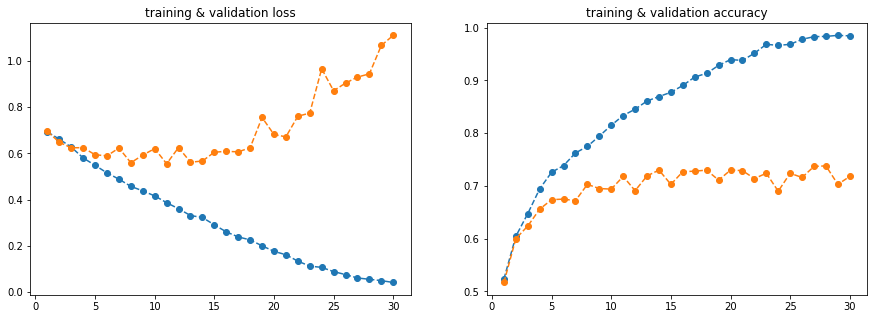

In [99]:
plot_model_training_history(history.history,plot_val=True)

## Setting up a data augmentation configuration via ImageDataGenerator

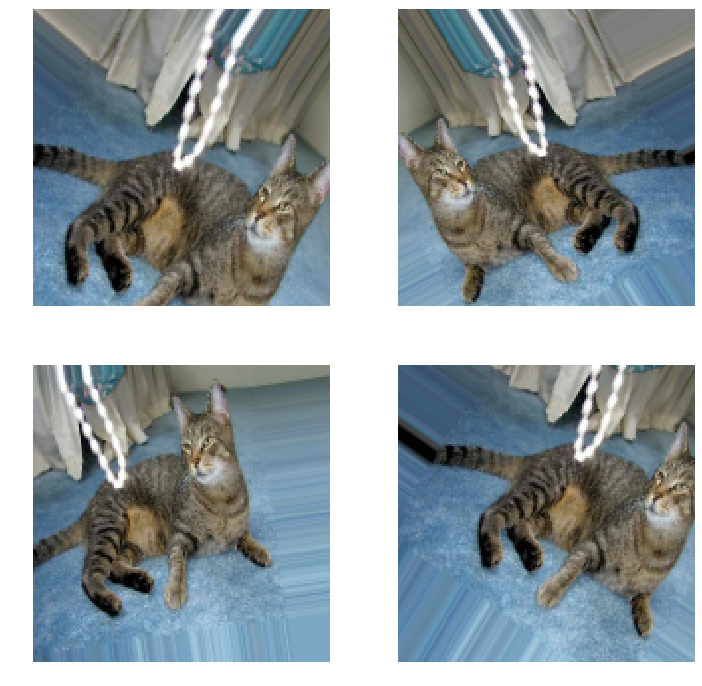

In [149]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# This is module with image preprocessing utilities
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x_ = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x_.shape)
# The .flow() command below generates batches of randomly transformed images. # It will loop indefinitely, so we need to `break` the loop at some point! i= 0
i=0
plt.figure(figsize=(12,12))
for batch in datagen.flow(x, batch_size=1):
    ax = plt.subplot(2, 2, i + 1)
    ax.set_aspect('equal')
    plt.axis("off")
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break        
plt.show()
plt.close()

## Defining a new convnet that includes dropout & training with augmented data

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 97s 966ms/step - loss: 0.6931 - acc: 0.5106 - val_loss: 0.6809 - val_acc: 0.5660
Epoch 2/100
100/100 [==============================] - 91s 911ms/step - loss: 0.6800 - acc: 0.5628 - val_loss: 0.6614 - val_acc: 0.5863
Epoch 3/100
100/100 [==============================] - 351s 4s/step - loss: 0.6626 - acc: 0.5988 - val_loss: 0.6277 - val_acc: 0.6415
Epoch 4/100
100/100 [==============================] - 91s 911ms/step - loss: 0.6520 - acc: 0.6159 - val_loss: 0.6319 - val_acc: 0.6231
Epoch 5/100
100/100 [==============================] - 91s 915ms/step - loss: 0.6356 - acc: 0.6391 - val_loss: 0.5871 - val_acc: 0.6739
Epoch 6/100
100/100 [==============================] - 71s 711ms/step - loss: 0.6201 - acc: 0.6453 - val_loss: 0.5754 - val_acc: 0.6830
Epoch 7/100
100/100 [==============================] - 55s 550ms/step - loss: 0.6102 - acc: 0.6688 - v

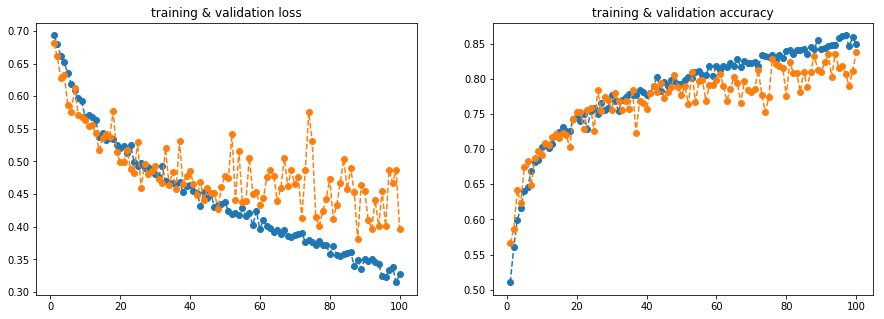

In [150]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))   # controls regularisation to prevent overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Training our convnet using data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


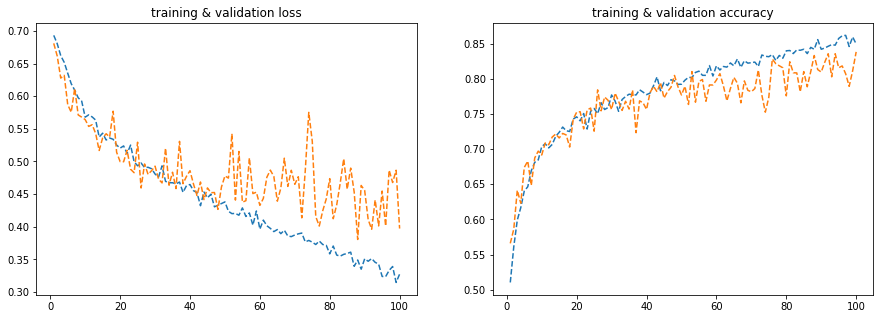

In [153]:
# plot model history
plot_model_training_history(history.history,chart_type="--")

########### save the model #################
# model.save('cats_and_dogs_small_2.h5')
############################################

## Using pre-trained convnet

![title](./pics/conv_pre_training.png)

## Instantiating the VGG16 convolutional base

In [2]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## Extracting features using the pre-trained convolutional base

In [10]:
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i =0
    for inputs_batch, labels_batch in generator:
            features_batch = conv_base.predict(inputs_batch)
            features[i * batch_size : (i + 1) * batch_size] = features_batch
            labels[i * batch_size : (i + 1) * batch_size] = labels_batch
            i += 1
            if i * batch_size >= sample_count:
                # Note that since generators yield data indefinitely in a loop,
                # we must `break` after every image has been seen once.
                break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Using the feature vectors to train dense model

In [11]:
# model architecture and training
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6171 - acc: 0.6680 - val_loss: 0.4562 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 2s 985us/step - loss: 0.4380 - acc: 0.8050 - val_loss: 0.3725 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3660 - acc: 0.8400 - val_loss: 0.3327 - val_acc: 0.8710
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3124 - acc: 0.8720 - val_loss: 0.3042 - val_acc: 0.8840
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2916 - acc: 0.8845 - val_loss: 0.2916 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2657 - acc: 0.8945 - val_loss: 0.2809 - val_acc: 0.8850
Epoch 7/30
2000/2000 [==============================] - 2s 1000us/step - loss: 0.2487 - acc: 0.8970 - val_loss: 0.2684 - val_acc: 0.8950
Epoch 8/3

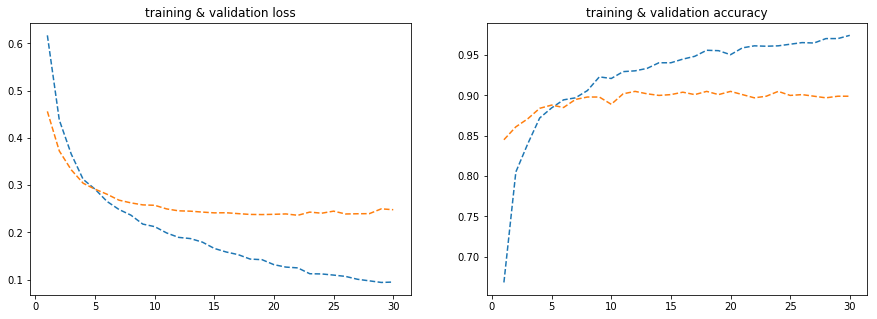

In [15]:
# plot model history
plot_model_training_history(history.history,chart_type="--o")

## Adding a densely-connected classifier on top of the convolutional base

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

## Freezing the convolutional base

In [ ]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

## Training the model end-to-end with a frozen convolutional base

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [13]:
# plot model history
plot_model_training_history(history.history,chart_type="--")

NameError: name 'plot_model_training_history' is not defined

## Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

## Fine-tuning our model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
# plot model history
plot_model_training_history(history.history,chart_type="--")